<p style="font-size:36px;background: rgba(222,36,65, 0.5);padding:10px 10px;border-radius:12px 5px 12px 5px">Diamond Price Prediction</p>

<img src="https://m.economictimes.com/thumb/msid-91531309,width-1200,height-900,resizemode-4,imgsize-64146/diamonds.jpg" height=750px, width=750px>

<p style="font-size:26px;background: rgba(182,136,185, 0.8);padding:10px 10px;border-radius:12px 5px 12px 5px">Contents</p>

<ul>
    <li><a href="#imp" style="color:rgba(182,136,185, 0.8); font-size:120%;">Importing Libraries</a></li>
    <li><a href="#load" style="color:rgba(182,136,185, 0.8);font-size:120%;">Loading Data</a></li>
    <li><a href="#eda" style="color:rgba(182,136,185, 0.8);font-size:120%;">Exploratory Data Analysis</a></li>
    <li><a href="#ho" style="color:rgba(182,136,185, 0.8);font-size:120%;">Handling Outliers</a></li>
    <li><a href="#fe" style="color:rgba(182,136,185, 0.8);font-size:120%;">Feature Engineering</a></li>
    <li><a href="#oe" style="color:rgba(182,136,185, 0.8);font-size:120%;">Ordinal Encoding</a></li>
    <li><a href="#fsts" style="color:rgba(182,136,185, 0.8);font-size:120%;">Feature Selection and Target Setting</a></li>
    <li><a href="#mod" style="color:rgba(182,136,185, 0.8);font-size:120%;">Modeling</a></li>
    <li><a href="#r" style="color:rgba(182,136,185, 0.8);font-size:120%;">Results</a></li>
</ul>

<p id="imp" style="font-size:26px;background: rgba(36,195,222, 0.5);padding:10px 10px;border-radius:12px 5px 12px 5px;width:300px">Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

<p id='load' style="font-size:26px;background: rgba(36,195,222, 0.5);padding:10px 10px;border-radius:12px 5px 12px 5px;width:200px">Loading Data</p>

In [2]:
data = pd.read_csv('../input/diamonds-prices/Diamonds Prices2022.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### The Unnamed: 0 column is of no use, so dropping that.

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<p id='eda' style="font-size:26px;background: rgba(36,195,222, 0.5);padding:10px 10px;border-radius:12px 5px 12px 5px;width:380px">Exploratory Data Analysis</p>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### No null values present in the dataset.

In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Separating Numerical and Categorical Columns

In [7]:
num_cols = data.select_dtypes('number')
cat_cols = data.select_dtypes('object')
for c in cat_cols.columns:
    print(cat_cols[c].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Visualizing the Categorical variables distribution

In [8]:
data[c].sort_values()

36190      I1
44901      I1
3552       I1
3551       I1
17016      I1
         ... 
23962    VVS2
23961    VVS2
34104    VVS2
24006    VVS2
34020    VVS2
Name: clarity, Length: 53943, dtype: object

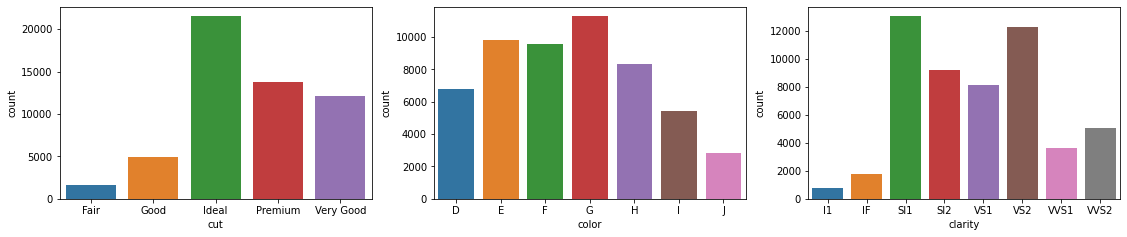

In [9]:
i = 1
plt.figure(figsize=(19, 12))
for c in cat_cols.columns:
    plt.subplot(3, 3, i)
    sns.countplot(x=data[c].sort_values())
    i+=1

<p id='ho' style="font-size:22px;background: rgba(36,195,222, 0.5);padding:10px 10px;border-radius:12px 5px 12px 5px;width:205px">Handling Outliers</p>

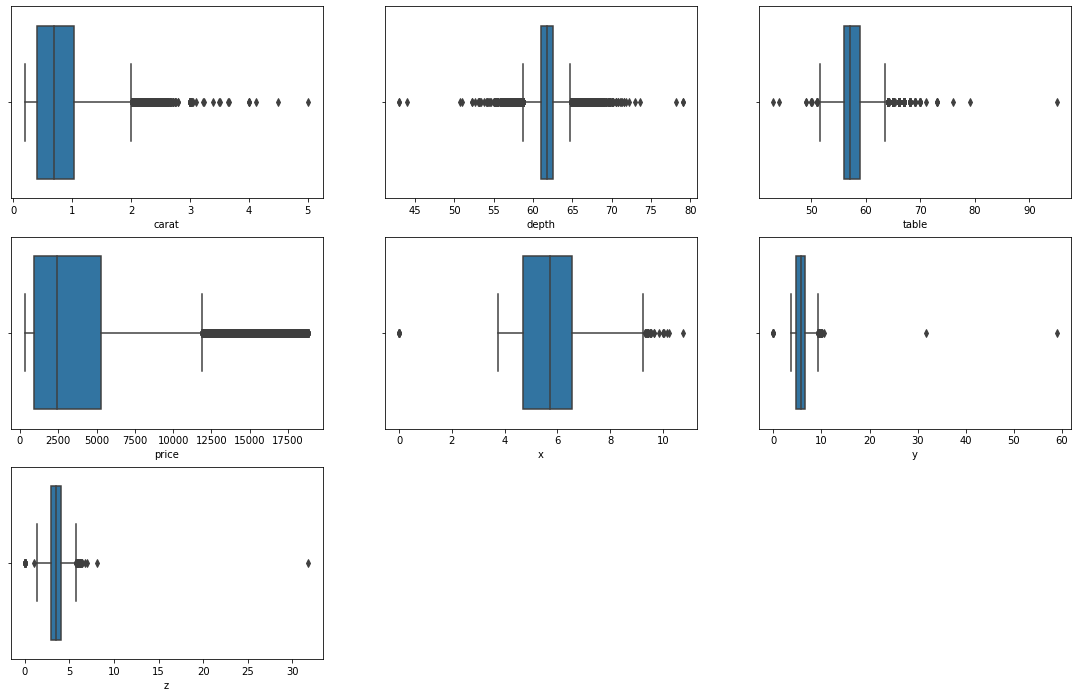

In [10]:
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[c])
    i+=1

#### ****Z-score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.     So it can be used to detect outliers.****
<img src="https://www.thoughtco.com/thmb/gItmqGd5HlnhyPIiLm1YHXOlTnw=/330x242/filters:fill(auto,1)/zscore-56a8fa785f9b58b7d0f6e87b.GIF" height=400, width=400>
<img src="https://miro.medium.com/max/692/1*er9yh82tMZ85RWOSkKb-xA.png" height=400, width=400>

#### So below in the code, the data values  whose z-score is less than 3 and greater than -3 are only taken.

In [11]:
outliers = (np.abs(stats.zscore(num_cols)) < 3)
for c in outliers.columns:
    print(outliers[c].unique())    

[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]


In [12]:
outliers

,carat,depth,table,price,x,y,z
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,False,False,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
53938,True,True,True,True,True,True,True
53939,True,True,True,True,True,True,True
53940,True,True,True,True,True,True,True
53941,True,True,True,True,True,True,True


In [13]:
import numpy as np
m = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        m[i][j] = i+2+j
m        

array([[ 2.,  3.,  4.,  5.,  6.],
       [ 3.,  4.,  5.,  6.,  7.],
       [ 4.,  5.,  6.,  7.,  8.],
       [ 5.,  6.,  7.,  8.,  9.],
       [ 6.,  7.,  8.,  9., 10.]])

In [14]:
M = pd.DataFrame(m)
(m>4)

array([[False, False, False,  True,  True],
       [False, False,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [15]:
M[(m>4).all(axis=1)]

,0,1,2,3,4
3,5.0,6.0,7.0,8.0,9.0
4,6.0,7.0,8.0,9.0,10.0


In [16]:
outliers.all(axis=1)

0         True
1         True
2        False
3         True
4         True
         ...  
53938     True
53939     True
53940     True
53941     True
53942     True
Length: 53943, dtype: bool

In [17]:
data[outliers.all(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [18]:
data[(np.abs(stats.zscore(num_cols)) < 3).all(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [19]:
data = data[(np.abs(stats.zscore(num_cols)) < 3).all(axis=1)]

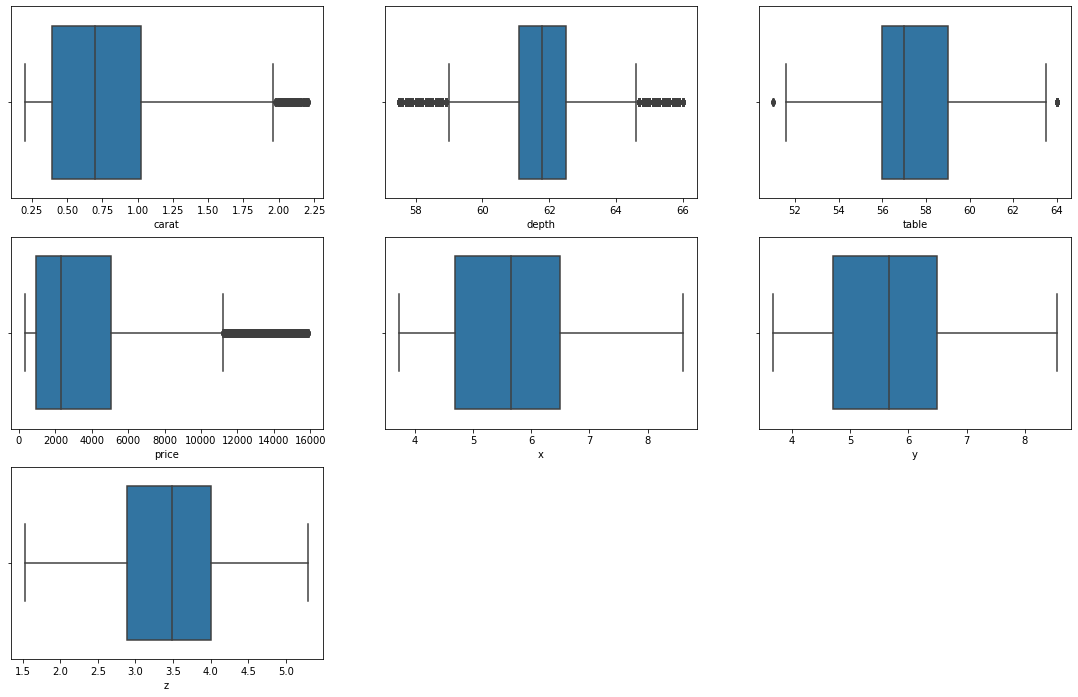

In [20]:
num_cols = data.select_dtypes('number')
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=num_cols[c])
    i+=1

<p id='fe' style="font-size:22px;background: rgba(36,195,222, 0.5);padding:10px 10px;border-radius:12px 5px 12px 5px;width:230px">Feature Engineering</p>

#### Creating some features that can help increase Model Accuracy

In [21]:
data['table_xy'] = (data['table'].mean()*(data['x']*data['y']).mean()-data['table']*(data['x']*data['y']))
data['depth_z'] = (data['depth'].mean()*data['z'].mean()-data['depth']*data['z'])

#### Distribution of each Numerical Feature

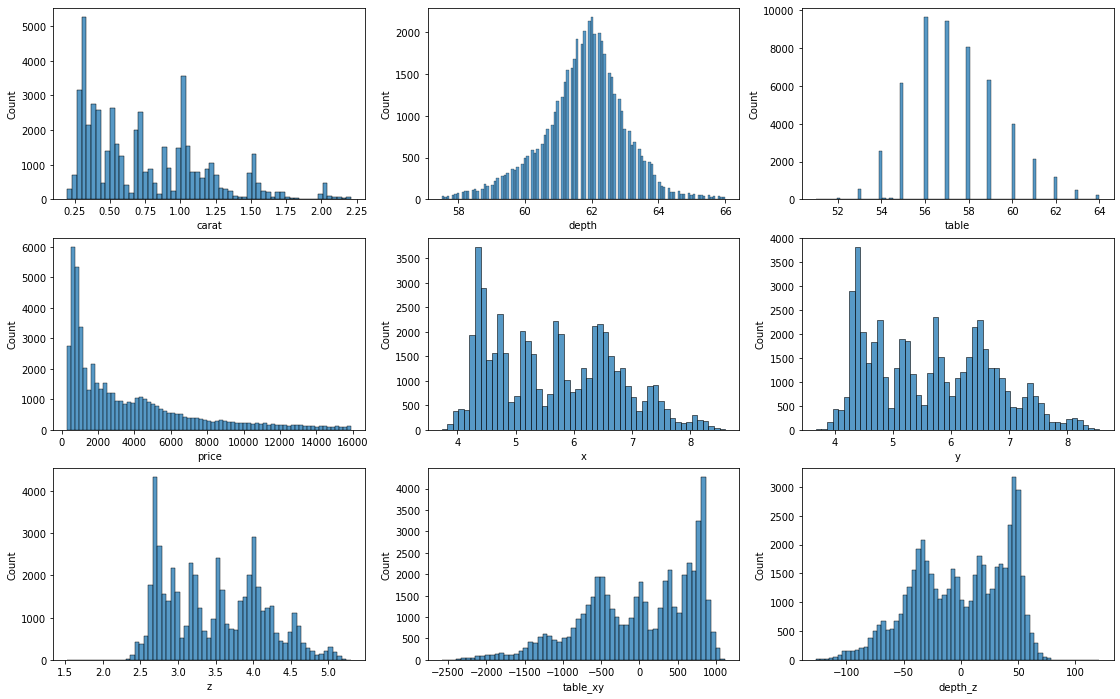

In [22]:
num_cols = data.select_dtypes('number')
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(3, 3, i)
    sns.histplot(x = data[c])
    i+=1

<p id='oe' style="font-size:22px;background: rgba(36,195,222, 0.5);padding:10px 10px;border-radius:12px 5px 12px 5px;width:200px">Ordinal Encoding</p>

<div style="font-size:24px">Encoding the ordinal variables</div><br/>
<p style="font-size:17px">
Fair --> Good --> Very Good --> Premium --> Ideal<br/>
J --> I --> H --> G --> F --> E --> D<br/>
I1 --> SI2 --> SI1 --> VS2 --> VS1 --> VVS2 --> VVS1 --> IF</p>

In [23]:
data['cut'] = data['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
data['color'] = data['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
data['clarity'] = data['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

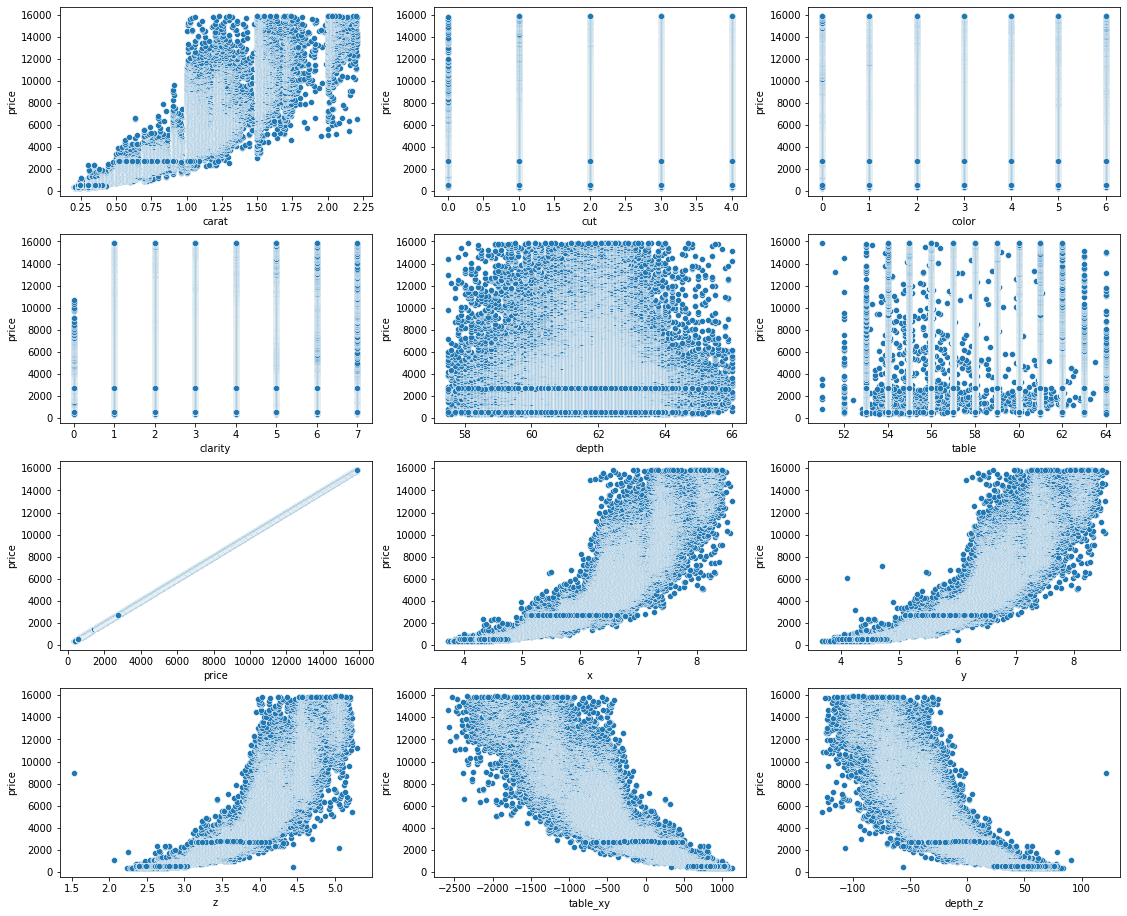

In [24]:
i = 1
plt.figure(figsize=(19, 16))
for c in data.columns:
    plt.subplot(4, 3, i)
    sns.scatterplot(x=data[c], y=data['price'])
    i+=1

#### Correlation of all variables with Price

In [25]:
data.corr()['price'].sort_values(ascending=False)

price       1.000000
carat       0.922409
y           0.891716
x           0.890451
z           0.887339
table       0.131667
depth      -0.001882
cut        -0.058479
clarity    -0.133364
color      -0.155356
depth_z    -0.871964
table_xy   -0.902404
Name: price, dtype: float64

#### Correlation Matrix

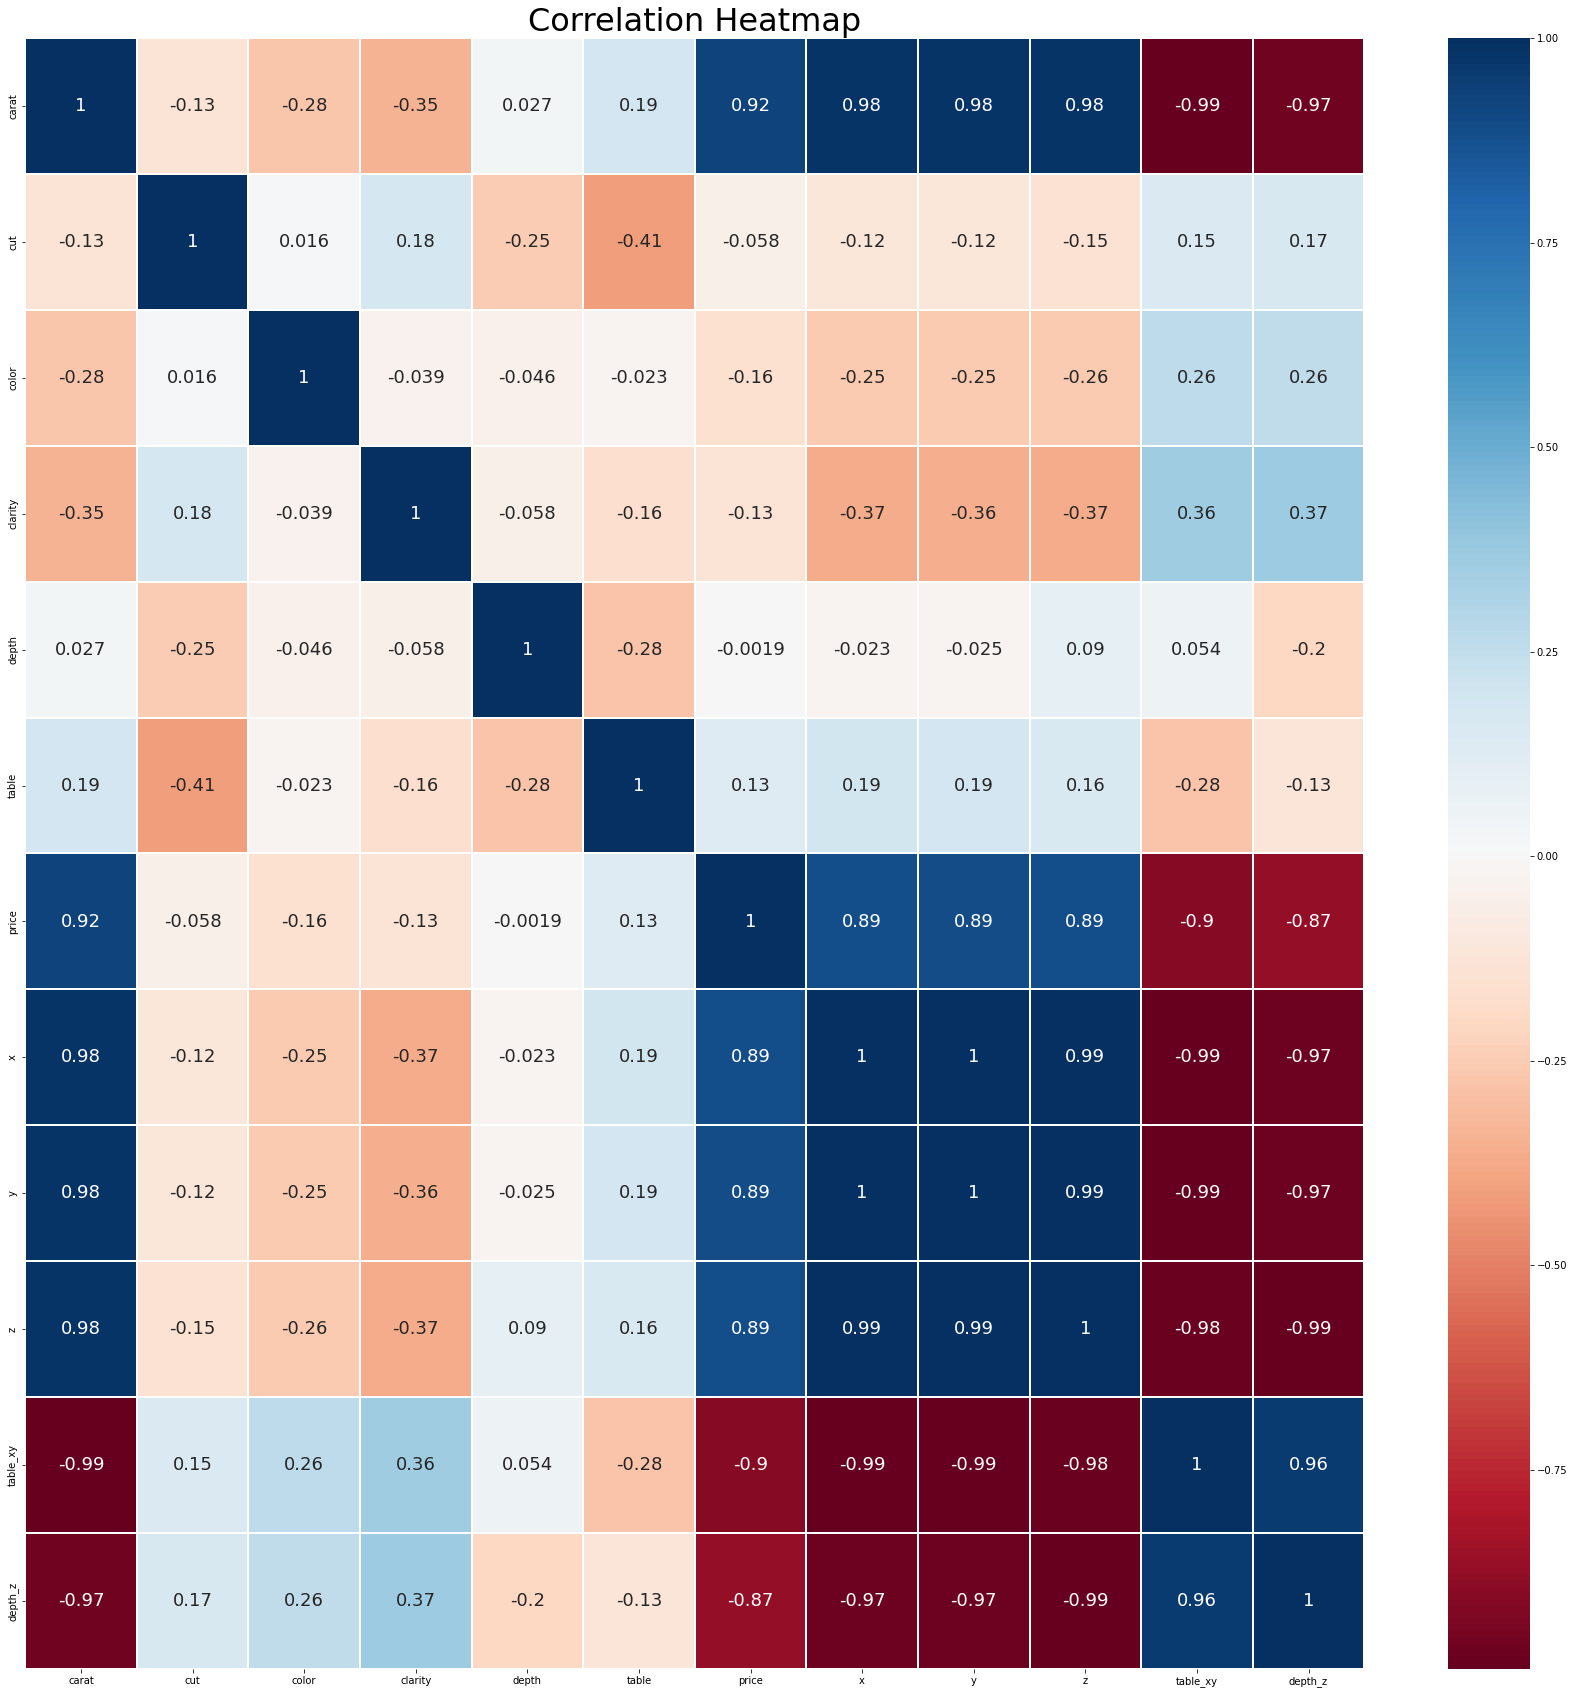

In [26]:
plt.figure(figsize=(30,30));
sns.heatmap(data.corr(),annot=True,cmap='RdBu',linewidth=0.01, annot_kws={'size': 18});
plt.title('Correlation Heatmap',fontsize=32,fontweight=5);

<p id='fsts' style="font-size:22px;background: rgba(36,195,222, 0.5);padding:10px 10px;border-radius:12px 5px 12px 5px;width:400px">Feature Selection and Target Setting</p>

In [27]:
X = data.drop(['price', 'table', 'depth'],axis=1)
y=data['price']

#### Getting the number of rows present to decide the proportion of split

In [28]:
y.shape

(51593,)

#### So for 80%-20% train-test split we will get corresponding number of data values as: (41274, 10319) which would be fine.

<p id='mod' style="font-size:26px;background: rgba(36,195,222, 0.5);padding:10px 10px;border-radius:12px 5px 12px 5px;width:150px">Modeling</p>

#### Looping over different random splits to verify the model's general accuracy. (Just like Cross Validation)

In [29]:
acc=[]
for i in [0, 1, 2, 3, 4, 5, 42]:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    mms = RobustScaler()
    X_train = mms.fit_transform(X_train)
    X_test = mms.transform(X_test)
    model = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc.append(r2_score(y_test, y_pred))

<p id='r' style="font-size:26px;background: rgba(36,195,222, 0.5);padding:10px 10px;border-radius:12px 5px 12px 5px;width:150px">Results</p>

In [30]:
acc_vals = np.array(acc)
acc_vals

array([0.98301059, 0.98285291, 0.98431416, 0.98218919, 0.98397709,
       0.9838898 , 0.98289461])

In [31]:
print(f"Average Accuracy: {acc_vals.mean()}   Standard Deviation in the accuracies: {acc_vals.std()}")

Average Accuracy: 0.9833040513490623   Standard Deviation in the accuracies: 0.0007087834174044343


<p style="font-size:28px;background: rgba(222,36,65, 0.5);padding:10px 10px;border-radius:12px 5px 12px 5px">Thank You for Reading&#33;&#33;</p>